# Mestrado 2023 - Implementações

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from optimize import fit_data
import optimize
from new_wave import get_transition_points

In [4]:
# Import data
data = pd.read_csv("../Datasets/italy_regions.csv") 

cities = ['Lombardia', 'Lazio', 'Campania', 'Veneto', 'Sicilia']

city_name = 'Sicilia' #region 
indicator='ICU Admissions'

In [5]:
data.columns

Index(['Unnamed: 0', 'data', 'denominazione_regione', 'ricoverati_con_sintomi',
       'terapia_intensiva', 'totale_ospedalizzati', 'totale_positivi',
       'variazione_totale_positivi', 'nuovi_positivi', 'deceduti',
       'totale_casi', 'ingressi_terapia_intensiva'],
      dtype='object')

In [6]:
# Filtra região de interesse
data = data[data['denominazione_regione'] == city_name]

# Get daily indicator
daily_data = data['terapia_intensiva']

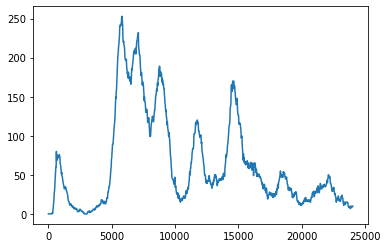

In [7]:
plt.plot(daily_data)

In [8]:
# Get cummulative indicator from daily data
acc_data = []
for i in range(len(daily_data)):
    acc_data.append(np.sum(daily_data[:i]))

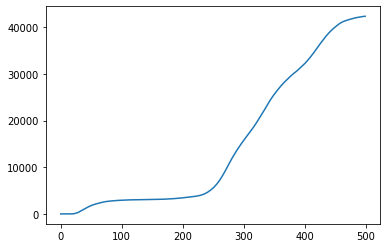

In [9]:
plt.plot(acc_data[:500])

In [10]:
# time array
t = np.linspace(0, len(acc_data)-1, len(acc_data))

normalized_acc_data = acc_data / max(acc_data)

#scaling_factor = 1000
scaling_factor = max(acc_data)
#scaling_factor = 1

acc_data = np.array(acc_data) / scaling_factor
daily_data = list(daily_data/ scaling_factor)

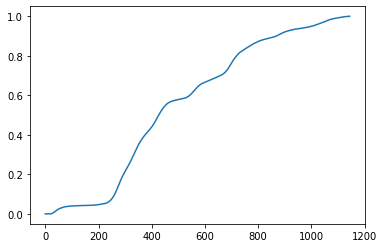

In [11]:
plt.plot(normalized_acc_data)

In [12]:
# Initial Conditions

def initial_cond_0(y_t):
    A0 = 2*max(y_t)
    tp0 = (2/3)*len(y_t)
    delta0 = (1/4)*len(y_t)
    nu0 = 1
    return [A0, tp0, delta0, nu0]

optimize.initial_cond = initial_cond_0

def update_cond_nw(A0, tp0):
    return [A0, tp0]
    
optimize.update_cond = update_cond_nw

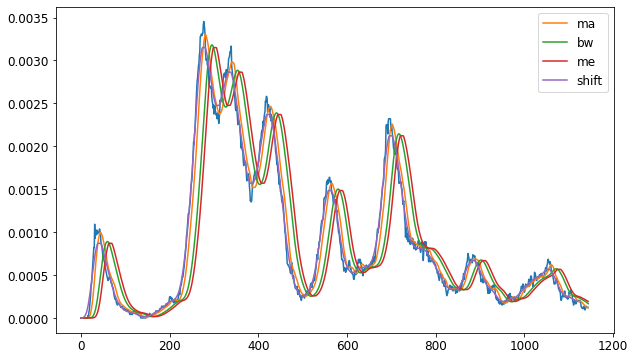

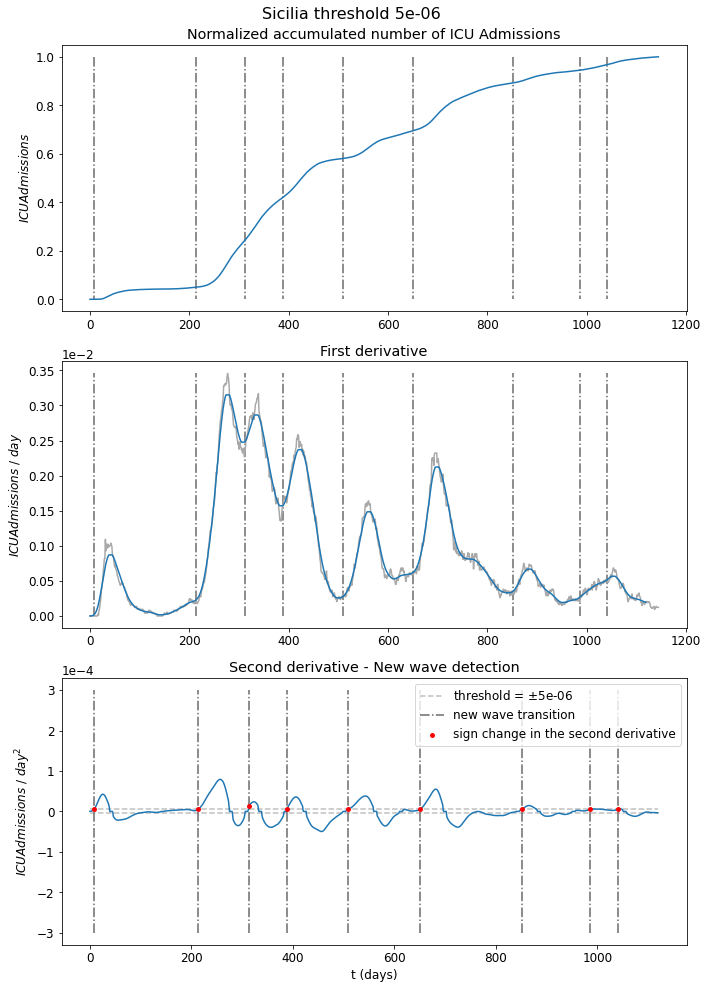

x_nw: [213, 313, 389, 509, 651, 852]


In [23]:
# Transition Points
x_nw = get_transition_points(scaling_factor*acc_data, visual=True, threshold=5e-6, indicator = indicator, city_name=city_name)

#x_nw = x_nw[:6]

# Campania e Sicilia
x_nw = x_nw[1:7]

print('x_nw:', x_nw)

In [14]:
#x_nw = [189, 361, 532, 630, 865, 1144]

In [15]:
x_nw

[6, 157, 207, 312, 389, 505]

In [ ]:
if (x_nw[-1] != len(acc_data) - 1):
    x_nw.append(len(acc_data) - 1)  

In [ ]:
city_name

In [ ]:
# utilizando scaling_factor = max(acc_data)

if (city_name == 'Lombardia'):
    # Manual (old)
    #x_nw = [189, 361, 532, 630, 865, 1144]

    # New automatic Lombardia
    x_nw = [174, 356, 523, 624, 856, 951]
elif (city_name == 'Lazio'):
    # New automatic Lazio
    x_nw = [187, 373, 514, 609, 839, 950]
elif (city_name == 'Campania'):
    # New automatic Campania 3e-6 x_nw[1:7]
    x_nw =  [184, 337, 525, 625, 646, 780]
elif (city_name == 'Veneto'):
    # new automatic Veneto 2e-6
    x_nw =  [183, 371, 506, 612, 800, 845]
elif (city_name == 'Sicilia'):
    #x_nw = [156, 320, 396, 513, 635, 852, 973] # com ITSE_norm e scaling_factor = 1000

    # Siscilia 5e-6 manual (213 -> 150) com th 5e-6 x_nw[1:7]
    x_nw = [150, 313, 389, 509, 651, 852]


In [30]:
#x_nw = [150, 313, 389, 509, 651, 852]

### Ajuste do modelo utilizando ITSE_norm

/home/fpelogia/Documentos/HMP/Implementações/Python/Mestrado 2023/epid_model.py:10: RuntimeWarning: overflow encountered in exp
  return A / ((1 + nu * np.exp(-1*(t - tp)/(delta)))**(1/nu))


Sigmoid #1 - A0:0.04110896241043945 | tp0:47.24512785841472 | delta0:12.36764064793769 | nu0:1.0 
n_days: 150 | len(y_m): 150
RMSE: 0.0006091867243405014 | Max(acc_data): 0.042193516672583774 | Rel. RMSE: 1.444%
(optimal) Sigmoid #1 - A0:0.04110896241043945 | tp0:47.24512785841472 | delta0:12.36764064793769 | nu0:1.0 


/home/fpelogia/Documentos/HMP/Implementações/Python/Mestrado 2023/epid_model.py:10: RuntimeWarning: overflow encountered in exp
  return A / ((1 + nu * np.exp(-1*(t - tp)/(delta)))**(1/nu))


Sigmoid #2 - A0:0.22671243168612049 | tp0:278.9335246984965 | delta0:17.403185321484834 | nu0:1.0 
n_days: 313 | len(y_m): 313
RMSE: 0.0027969054609322578 | Max(acc_data): 0.24371193707840622 | Rel. RMSE: 1.148%
(optimal) Sigmoid #2 - A0:0.22671243168612049 | tp0:278.9335246984965 | delta0:17.403185321484834 | nu0:1.0 


/home/fpelogia/Documentos/HMP/Implementações/Python/Mestrado 2023/epid_model.py:10: RuntimeWarning: overflow encountered in exp
  return A / ((1 + nu * np.exp(-1*(t - tp)/(delta)))**(1/nu))


Sigmoid #3 - A0:0.17398729243376682 | tp0:337.8336871549944 | delta0:13.264487238761578 | nu0:1.0 


/home/fpelogia/Documentos/HMP/Implementações/Python/Mestrado 2023/epid_model.py:10: RuntimeWarning: overflow encountered in double_scalars
  return A / ((1 + nu * np.exp(-1*(t - tp)/(delta)))**(1/nu))
/home/fpelogia/Documentos/HMP/Implementações/Python/Mestrado 2023/epid_model.py:20: RuntimeWarning: overflow encountered in double_scalars
  return (A * g(t))/(delta * (1 + nu*g(t))**((nu+1)/nu))
/home/fpelogia/Documentos/HMP/Implementações/Python/Mestrado 2023/epid_model.py:10: RuntimeWarning: overflow encountered in double_scalars
  return A / ((1 + nu * np.exp(-1*(t - tp)/(delta)))**(1/nu))


n_days: 389 | len(y_m): 389
RMSE: 0.001222161172803966 | Max(acc_data): 0.4195728759865636 | Rel. RMSE: 0.291%
(optimal) Sigmoid #3 - A0:0.17398729243376682 | tp0:337.8336871549944 | delta0:13.264487238761578 | nu0:1.0 


/home/fpelogia/Documentos/HMP/Implementações/Python/Mestrado 2023/epid_model.py:10: RuntimeWarning: overflow encountered in exp
  return A / ((1 + nu * np.exp(-1*(t - tp)/(delta)))**(1/nu))


Sigmoid #4 - A0:0.13918337343031198 | tp0:427.4286687453793 | delta0:15.019990938943375 | nu0:1.0 


/home/fpelogia/Documentos/HMP/Implementações/Python/Mestrado 2023/epid_model.py:20: RuntimeWarning: overflow encountered in double_scalars
  return (A * g(t))/(delta * (1 + nu*g(t))**((nu+1)/nu))
/home/fpelogia/Documentos/HMP/Implementações/Python/Mestrado 2023/epid_model.py:10: RuntimeWarning: overflow encountered in double_scalars
  return A / ((1 + nu * np.exp(-1*(t - tp)/(delta)))**(1/nu))


n_days: 509 | len(y_m): 509
RMSE: 0.0008161844444507707 | Max(acc_data): 0.5803451948548488 | Rel. RMSE: 0.141%
(optimal) Sigmoid #4 - A0:0.13918337343031198 | tp0:427.4286687453793 | delta0:15.019990938943375 | nu0:1.0 


/home/fpelogia/Documentos/HMP/Implementações/Python/Mestrado 2023/epid_model.py:10: RuntimeWarning: overflow encountered in exp
  return A / ((1 + nu * np.exp(-1*(t - tp)/(delta)))**(1/nu))


Sigmoid #5 - A0:0.10006412732139267 | tp0:565.9836469134369 | delta0:16.774143470856426 | nu0:1.0 


/home/fpelogia/Documentos/HMP/Implementações/Python/Mestrado 2023/epid_model.py:20: RuntimeWarning: overflow encountered in double_scalars
  return (A * g(t))/(delta * (1 + nu*g(t))**((nu+1)/nu))


n_days: 651 | len(y_m): 651
RMSE: 0.0014172922954445212 | Max(acc_data): 0.6949777425785837 | Rel. RMSE: 0.204%
(optimal) Sigmoid #5 - A0:0.10006412732139267 | tp0:565.9836469134369 | delta0:16.774143470856426 | nu0:1.0 


/home/fpelogia/Documentos/HMP/Implementações/Python/Mestrado 2023/epid_model.py:10: RuntimeWarning: overflow encountered in double_scalars
  return A / ((1 + nu * np.exp(-1*(t - tp)/(delta)))**(1/nu))
/home/fpelogia/Documentos/HMP/Implementações/Python/Mestrado 2023/epid_model.py:10: RuntimeWarning: overflow encountered in exp
  return A / ((1 + nu * np.exp(-1*(t - tp)/(delta)))**(1/nu))


Sigmoid #6 - A0:0.19031328308571835 | tp0:714.8031198251023 | delta0:26.025372138390402 | nu0:1.0 


/home/fpelogia/Documentos/HMP/Implementações/Python/Mestrado 2023/epid_model.py:20: RuntimeWarning: overflow encountered in double_scalars
  return (A * g(t))/(delta * (1 + nu*g(t))**((nu+1)/nu))


n_days: 852 | len(y_m): 852
RMSE: 0.0019557783042069847 | Max(acc_data): 0.8923177758964416 | Rel. RMSE: 0.219%


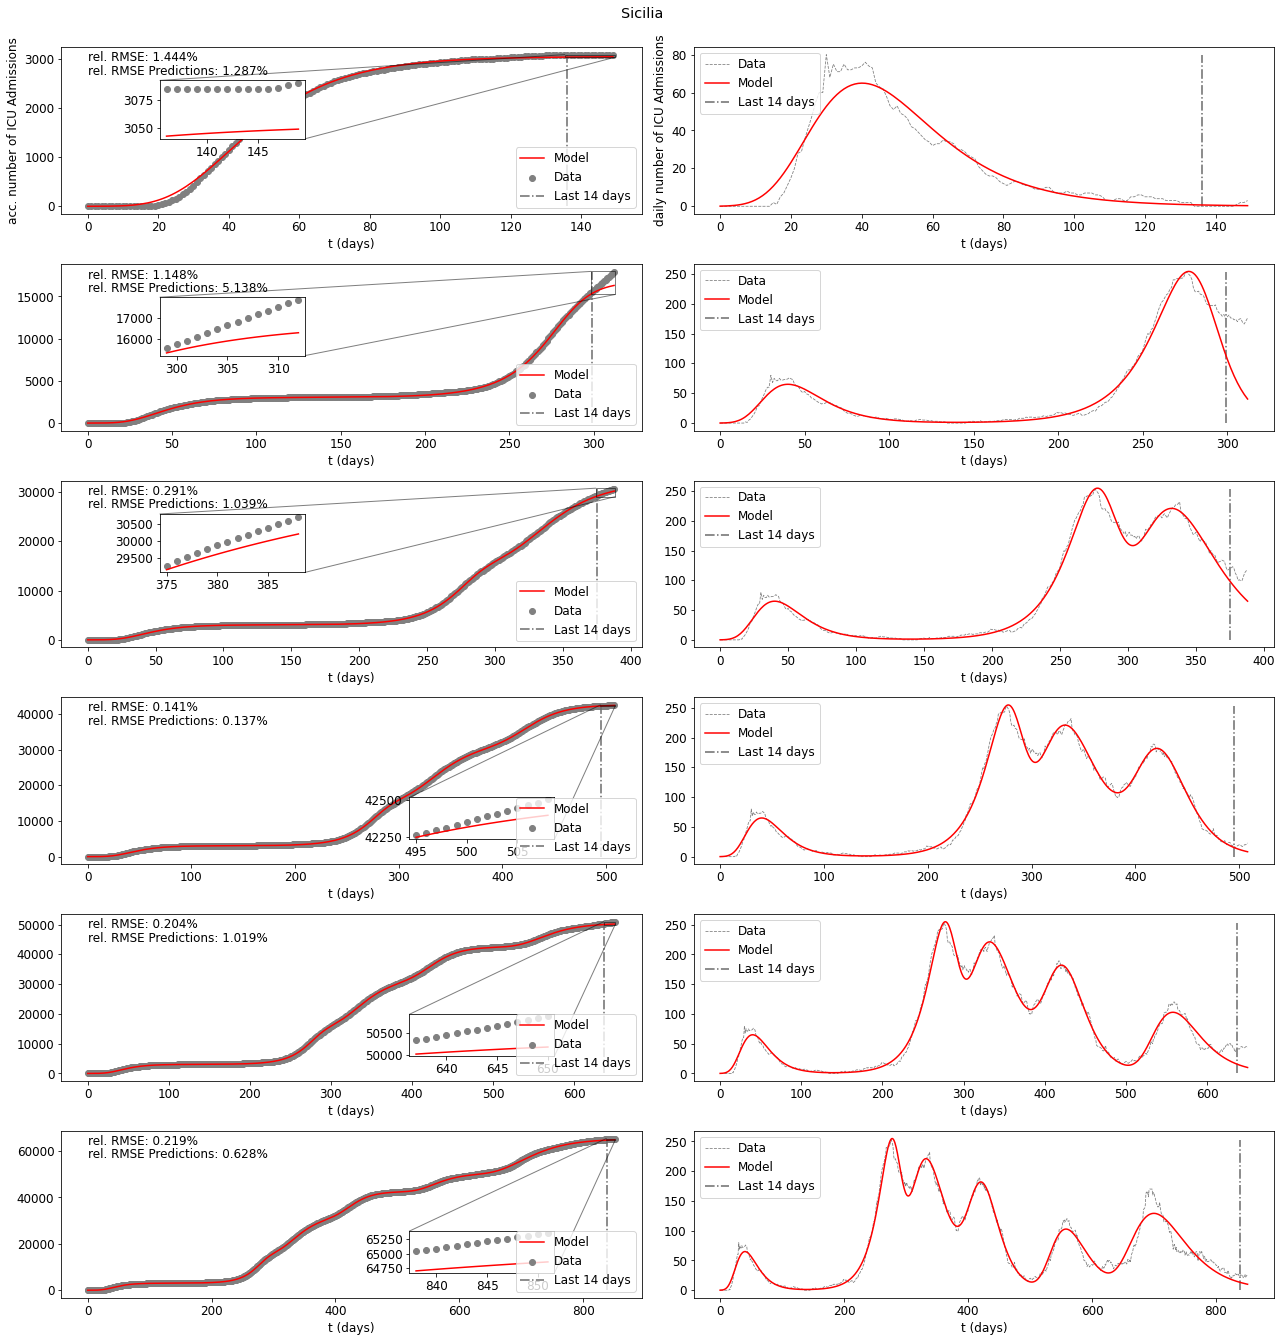

In [31]:
sig_params, rel_rmse_list, y_m = optimize.fit_data(acc_data, 
                               daily_data, 
                               city_name, 
                               x_nw, 
                               indicator = indicator, 
                               n_weeks_pred = 2,
                               scaling_factor = scaling_factor,
                               loss_function = 'ITSE'
                            )

In [ ]:
data['data'].to_list()[1130]

In [ ]:
rel_rmse_list